# 实验二
# logistic regression（逻辑回归）

## 一、线性可分

（案例图，假设函数，sigmoid函数y=0或y=1，损失函数，代价函数，梯度下降）

（损失函数，梯度下降函数，维度）

案例：根据学生的两门学生成绩，预测该学生是否被大学录取

数据集：ex2data1.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 导入文件：
path = 'ex2data1.txt'
data = pd.read_csv(path,names = ['Exam 1','Exam 2','Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


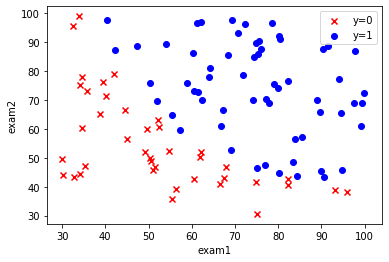

In [3]:
# 数据可视化：
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()

ax.set(xlabel = 'exam1',
      ylabel = 'exam2')
plt.show()

In [4]:
# 损失函数：
def get_Xy(data):

    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values

    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)

    return X,y

X,y = get_Xy(data)
X.shape
y.shape

(100, 1)

In [6]:
# 定义sigmoid函数：
def sigmoid(z):

    return 1/(1 + np.exp(-z))

# 定义代价函数：
def costFunction(X,y,theta):

    A = sigmoid(X@theta)

    first = y * np.log(A)
    second = (1-y)* np.log(1 - A)

    return -np.sum (first + second)/len(X)

theta = np.zeros((3,1))
theta.shape

cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [7]:
# 梯度下降：
def gradientDescent(X, y, theta, iters,alpha):
    m = len(X)
    costs = []

    for i in range(iters):
        A = sigmoid(X@theta)
        theta = theta - (alpha/m) * X.T@(A - y)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return costs,theta
alpha = 0.004
iters = 200000
costs,theta_final = gradientDescent(X,y,theta,iters,alpha)

print(theta_final)

1.9886538578930086
3.078170019864155
5.487009635362496
1.851943366133264
2.9551289424083613
5.438688730769618
1.8046128090728513
2.8312715776074038
5.3886531633606145
1.7561538117121556
2.7066763807478127
5.3365673644957425
1.706280704769481
2.581850851905427
5.281774101800353
1.654412995851206
2.4578430947435757
5.223255119969365
1.5996612097145573
2.3362477519414626
5.159653459570274
1.5408871901849062
2.2190492038468914
5.089387088751128
1.4768567851081462
2.108268509053649
5.010845104587983
1.4064493632805852
2.0054338903832725
4.9225734611717336
1.3288041261254455
1.9109646054893648
4.823257484826611
1.2432202250971691
1.8235866121521422
4.711246821296763
1.1486277932139572
1.7397667362448002
4.5832574004573505
1.0423478306006702
1.6525865746034045
4.430932868329269
0.9166267386002215
1.5465331276550864
4.224624720512682
0.7330944584991153
4.209832575691547
0.6472609974818119
2.383565184191488
0.3219694445813797
3.1737936594526563
1.2383740899763556
0.23891500688933143
0.879141247

In [8]:
# 定义预测函数：
def predict(X, theta):

    prob = sigmoid(X @ theta)

    return [1 if x >= 0.5 else 0 for x in prob]
# 正确率：
y_ = np.array(predict(X, theta))
y_pre = y_.reshape(len(y_), 1)

acc = np.mean(y_pre == y)

print(acc)

0.6


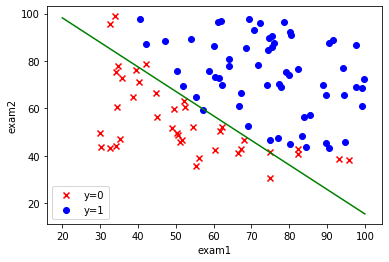

In [9]:
# 决策边界：
coef1 = - theta_final[0,0]/theta_final[2,0]
coef2 = - theta_final[1,0]/theta_final[2,0]

x = np.linspace(20,100,100)
f = coef1 + coef2*x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel = 'exam1',
      ylabel = 'exam2')

ax.plot(x,f,c='g')
plt.show()


## 二、线性不可分

案例：设想你是工厂的生产主管，你要决定是否芯片要被接受或者抛弃

数据集：ex2data2.txt，芯片在两次测试中的测试结果

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 导入文件：
path = 'ex2data2.txt'
data = pd.read_csv(path,names = ['Test 1','Test 2','Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


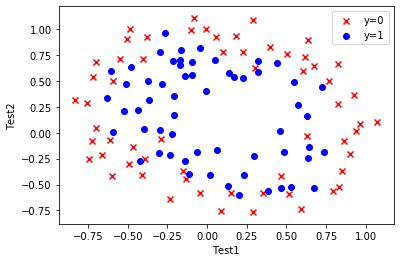

In [12]:
#数据可视化：
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()

ax.set(xlabel = 'Test1',
      ylabel = 'Test2')
plt.show()


In [13]:
# 特征映射：
def feature_mapping(x1,x2,power):
    data = {}

    for i in np.arange(power + 1):
        for j in np.arange(i + 1):
            data['F{}{}'.format(i - j,j)] = np.power(x1,i - j)* np.power(x2,j)

    return pd.DataFrame(data)

x1 = data['Test 1']
x2 = data['Test 2']
data2 = feature_mapping(x1,x2,6)
data2.head()


,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [14]:
# 构造数据集：
X = data2.values
X.shape
y = data.iloc[:,-1].values
y = y.reshape(len(y),1)
y.shape
# 损失函数：
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunction(X,y,theta,lamda):
    A = sigmoid(X@theta)

    first = y*np.log(A)
    second = (1 - y)* np.log(1 - A)

    reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 * len(X)))

    return  -np.sum(first + second)/len(X) + reg

theta = np.zeros((28,1))
theta.shape

lamda = 1

cost_init = costFunction(X,y,theta,lamda )
print(cost_init)


0.6931471805599454


In [15]:
# 梯度下降函数：
def gradientDescent(X,y,theta,alpha,iters,lamda):
    costs = []

    for i in range(iters):

        reg = theta[1:] * (lamda/len(X))
        reg = np.insert(reg,0,values=0,axis=0)

        theta = theta - (X.T@(sigmoid(X@theta)- y))* alpha/len(X)-reg
        cost = costFunction(X, y, theta,lamda)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return theta,costs
alpha = 0.001
iters = 200000
lamda = 0.001
theta_final,costs = gradientDescent(X,y,theta,alpha,iters,lamda)


0.693134380798985
0.6818650671550655
0.672748697667896
0.6649382350210216
0.6579891999128368
0.6516587811169662
0.645806149345912
0.6403433508679413
0.6352109729552581
0.6303658897986846
0.625774925450325
0.621411446085434
0.6172534280039077
0.613282288876784
0.6094821289408
0.6058392039109464
0.6023415373766955
0.598978623166525
0.5957411897406796
0.5926210098409752
0.5896107446192149
0.5867038148430397
0.5838942938016073
0.5811768178314223
0.5785465112720828
0.5759989233067381
0.5735299746304319
0.5711359122705992
0.5688132711873028
0.5665588415252293
0.5643696405879911
0.5622428887672919
0.5601759887921506
0.5581665077721994
0.5562121615984903
0.5543108013388562
0.5524604013255084
0.5506590486826008
0.5489049340828341
0.547196343556383
0.5455316512037751
0.5439093126878609
0.5423278593995745
0.5407858932084393
0.5392820817223566
0.5378151539925351
0.536383896608914
0.5349871501393716
0.5336238058727042
0.5322928028309695
0.5309931250215411
0.5297237989032203
0.5284838910441562
0.527

In [16]:
# 定义预测函数：
def predict(X, theta):
    prob = sigmoid(X @ theta)

    return [1 if x >= 0.5 else 0 for x in prob]
# 正确率：
y_ = np.array(predict(X, theta_final))
y_pre = y_.reshape(len(y_), 1)

acc = np.mean(y_pre == y)

print(acc)


0.8305084745762712


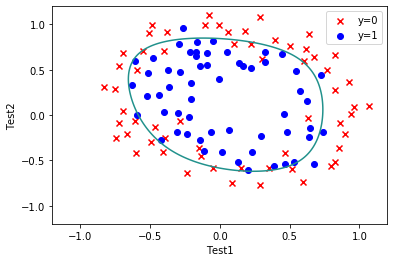

In [17]:
# 决策边界：
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values

zz = z @ theta_final
zz =zz.reshape(xx.shape)

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel = 'Test1',
      ylabel = 'Test2')

plt.contour(xx,yy,zz,0)
plt.show()
